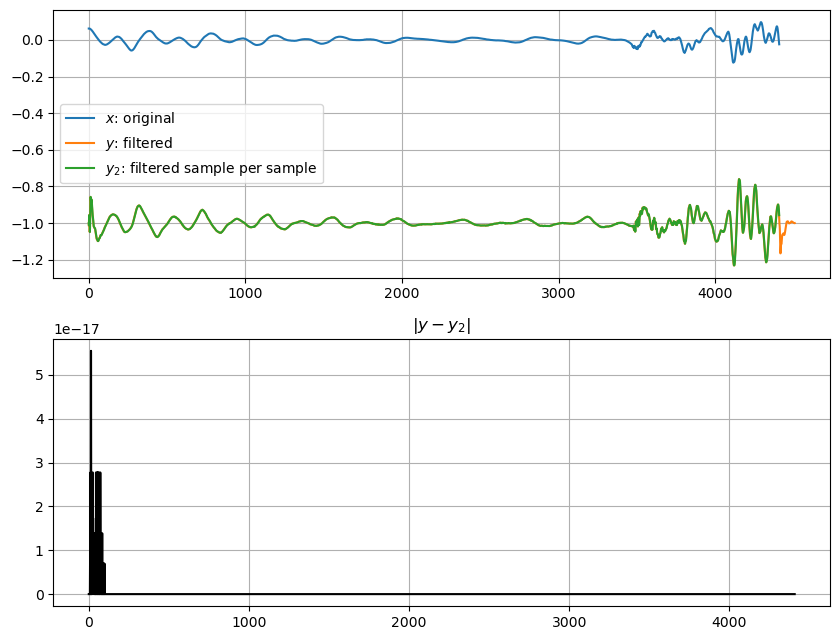

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
import matplotlib
matplotlib.style.use('default')  # <-- for Jupyter: white figures background

Lf = 100    # number of filter taps
T = 0.1       # signal duration [s]
# Load RIR
w, _ = sf.read('U:/py/sounds-phd/97_tests/05_dsp_related/00_signals/rir1.wav')
w = w[:Lf]
w /= np.amax(w) 

# Generate signal
x, fs = sf.read('U:/py/sounds-phd/02_data/00_raw_signals/01_speech/speech1.wav')
x = x[20000:20000+int(T * fs)]

# Filter signal all at once
y = sig.convolve(x, w, method='direct')

# Construct filtered signal sample per samplet
y2 = np.zeros_like(x)
for n in range(len(x)):

    if n < Lf:
        currChunk = np.concatenate((np.zeros(Lf - n), x[:n]))
    else:
        currChunk = x[(n - Lf):n]

    # Convolve
    tmp = sig.convolve(currChunk, w, mode='valid', method='direct')
    # y2[n] = tmp[-Lf+1]
    y2[n] = tmp[-1]

fig, axes = plt.subplots(2,1)
fig.set_size_inches(8.5, 6.5)
axes[0].plot(x, label='$x$: original')
axes[0].plot(y - 1, label='$y$: filtered')
axes[0].plot(y2 - 1, label='$y_2$: filtered sample per sample')
axes[0].grid()
axes[0].legend(loc='center left')
axes[1].plot(np.abs(y2[1:] - y[:-Lf]), 'k')
axes[1].grid()
axes[1].set_title('$|y - y_2|$')
fig.tight_layout()

In [41]:
# Listen
import simpleaudio as sa
import time
audio_array = y * 32767 / max(abs(y))
audio_array = audio_array.astype(np.int16)
sa.play_buffer(audio_array,1,2,fs)
time.sleep(T)
audio_array = y2 * 32767 / max(abs(y2))
audio_array = audio_array.astype(np.int16)
sa.play_buffer(audio_array,1,2,fs)
time.sleep(T)
audio_array = x * 32767 / max(abs(x))
audio_array = audio_array.astype(np.int16)
sa.play_buffer(audio_array,1,2,fs)